In [8]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from LogisticRegression import LogisticRegression
from MultilayerPerceptron import MultilayerPerceptron

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
def plot_confusion_matrix(confusion_matrix, title='Confusion Matrix'):
    plt.figure(figsize=(10,6))
    ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    plt.show()

In [5]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

In [6]:
LR_Model = LogisticRegression(learning_rate=0.01, num_iterations=1000)

LR_Model.fit(X_train, y_train)

y_pred = LR_Model.predict(X_test)

logistic_regression_confusuion_matrix = LR_Model.confusion_matrix(y_test, y_pred)
accuracy, precision, recall, f1_score = LR_Model.metrics(logistic_regression_confusuion_matrix)

print('Confusion Matrix:\n', logistic_regression_confusuion_matrix)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

Confusion Matrix:
 [[99  0]
 [53  2]]
Accuracy: 0.6558441558441559
Precision: 1.0
Recall: 0.03636363636363636
F1 Score: 0.07017543859649122


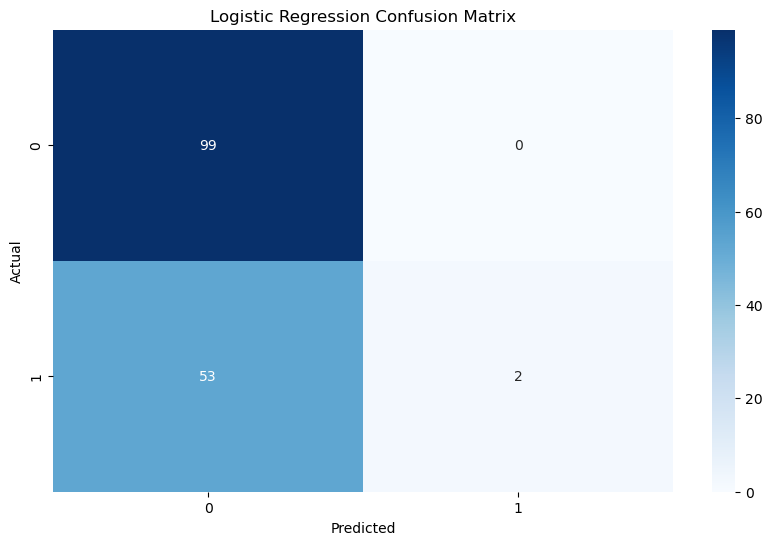

In [7]:
plot_confusion_matrix(logistic_regression_confusuion_matrix, title='Logistic Regression Confusion Matrix')

In [9]:
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).long()
y_test_tensor = torch.from_numpy(y_test).long()

Epoch 0, Training Loss: 7.82033634185791 - Training Accuracy: 0.3452768623828888
Epoch 100, Training Loss: 0.5663963556289673 - Training Accuracy: 0.723127007484436
Epoch 200, Training Loss: 0.5346953272819519 - Training Accuracy: 0.732899010181427
Epoch 300, Training Loss: 0.5008679628372192 - Training Accuracy: 0.7442996501922607
Epoch 400, Training Loss: 0.4594588279724121 - Training Accuracy: 0.7850162982940674
Epoch 500, Training Loss: 0.44774743914604187 - Training Accuracy: 0.7996742725372314
Epoch 600, Training Loss: 0.42775291204452515 - Training Accuracy: 0.8094462752342224
Epoch 700, Training Loss: 0.4201925992965698 - Training Accuracy: 0.8110749125480652
Epoch 800, Training Loss: 0.4161549508571625 - Training Accuracy: 0.8143322467803955
Epoch 900, Training Loss: 0.40997835993766785 - Training Accuracy: 0.8192182183265686


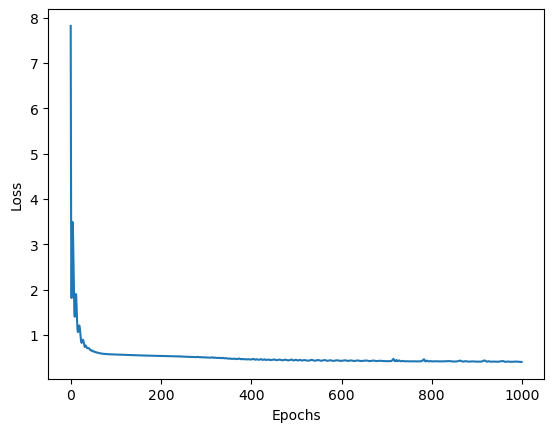

In [10]:
mlp = MultilayerPerceptron(input_size=X_train_tensor.shape[1], hidden_size=X_train_tensor.shape[1]*2, output_size=2, activation="relu")
mlp.fit(X_train_tensor, y_train_tensor, epochs=1000)

In [11]:
y_pred = mlp.predict(X_test_tensor)
y_pred = torch.argmax(y_pred, dim=1)
mlp_confusion_matrix = mlp.confusion_matrix(y_test_tensor, y_pred)
accuracy, precision, recall, f1_score = mlp.metrics(mlp_confusion_matrix)

print('Confusion Matrix:\n', mlp_confusion_matrix)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

Confusion Matrix:
 [[88 11]
 [23 32]]
Accuracy: 0.7792207792207793
Precision: 0.7441860465116279
Recall: 0.5818181818181818
F1 Score: 0.6530612244897959


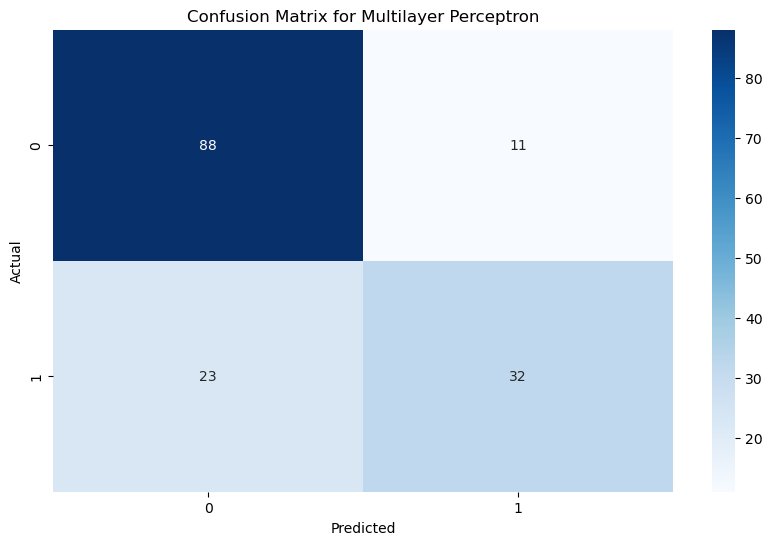

In [12]:
plot_confusion_matrix(mlp_confusion_matrix, "Confusion Matrix for Multilayer Perceptron")